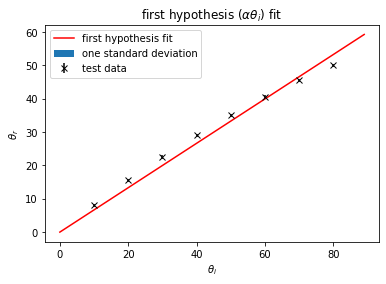

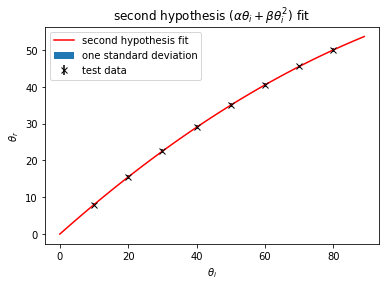

---Hypothesis 1---
Chi-sq-min/NDoF:	19.235294117647054
p-value:		6.711003202955456e-26
---Hypothesis 2---
Chi-sq-min/NDoF:	0.0
p-value:		1.0
---Hypothesis 3---
Chi-sq-min/NDoF:	2.0003105594271977
p-value:		0.05114270171746438


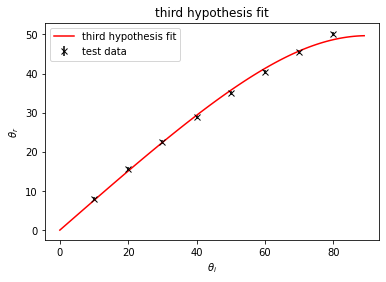

In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib
import matplotlib.pyplot as plt

# Define the data set

t_i = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
t_r = np.array([8.0,  15.5, 22.5, 29.0, 35.0, 40.5, 45.5, 50.0])
sig = np.array([0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])


# Define Hypotheses

def h1(t_i, *vars):
    a, = vars
    return a*t_i

def h2(t_i, *vars):
    a, b = vars
    return a*t_i - b*t_i**2

# Curve fitting

p0_1 = np.array([1.0])
p0_2 = np.array([1.0, 1.0])

params_1, covariance_1 = curve_fit(h1, t_i, t_r, p0_1, sig, absolute_sigma=True)
params_2, covariance_2 = curve_fit(h2, t_i, t_r, p0_2, sig, absolute_sigma=True)

# Parameter standard deviation

params_1_std_dev = np.sqrt(np.diag(covariance_1))
params_2_std_dev = np.sqrt(np.diag(covariance_2))

# Plotting

fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot()
ax1.set_title('first hypothesis ($\\alpha \\theta_i$) fit')
ax2 = fig2.add_subplot()
ax2.set_title('second hypothesis ($\\alpha \\theta_i+\\beta \\theta_i^2$) fit')
ax1.set_ylabel("$\\theta_r$")
ax2.set_ylabel("$\\theta_r$")
ax1.set_xlabel("$\\theta_i$")
ax2.set_xlabel("$\\theta_i$")

t_i_val = np.arange(0, 90, 1)

def std_dev(t_i, cov): return np.sqrt(sum([(t_i**(i+j))*cov[i][j] for i in range(len(cov)) for j in range(len(cov))]))

## Given Data
ax1.errorbar(t_i, t_r, yerr=sig, fmt='kx', label="test data")
ax2.errorbar(t_i, t_r, yerr=sig, fmt='kx', label="test data")

## Plot the two fits
ax1.plot(t_i_val, h1(t_i_val, *params_1), 'r', label="first hypothesis fit")
ax1.fill_between(t_i_val, h1(t_i_val, *params_1)-std_dev(t_i_val, covariance_1), h1(t_i_val, *params_1)+std_dev(t_i_val, covariance_1), label="one standard deviation")
ax1.legend()

ax2.plot(t_i_val, h2(t_i_val, *params_2), 'r', label="second hypothesis fit")
ax2.fill_between(t_i_val, h2(t_i_val, *params_2)-std_dev(t_i_val, covariance_2), h2(t_i_val, *params_2)+std_dev(t_i_val, covariance_2), label="one standard deviation")
ax2.legend()

plt.show()

# Chi-Square

## Hypothesis 1
chi_sq_min_1 = sum(((t_r - h1(t_i, *params_1))/sig)**2)
ndof_1 = len(t_i)-len(p0_1)
print(f"---Hypothesis 1---\nChi-sq-min/NDoF:\t{chi_sq_min_1/ndof_1}\np-value:\t\t{chi2.sf(chi_sq_min_1, df=ndof_1)}")

## Hypothesis 2
chi_sq_min_2 = sum(((t_r - h2(t_i, *params_2))/sig)**2)
ndof_2 = len(t_i)-len(p0_2)
print(f"---Hypothesis 2---\nChi-sq-min/NDoF:\t{chi_sq_min_2/ndof_2}\np-value:\t\t{chi2.sf(chi_sq_min_2, df=ndof_2)}")

# Ex 3b

# Define Sahl formula

def h3(t_i, *vars):
    r, = vars
    return np.rad2deg(np.arcsin( np.sin(np.deg2rad(t_i)) / r ))

p0_3 = np.array([1.0])

params_3, covariance_3 = curve_fit(h3, t_i, t_r, p0_3, sig, absolute_sigma=True)

chi_sq_min_3 = sum(((t_r - h3(t_i, *params_3))/sig)**2)
ndof_3 = len(t_i)-len(p0_3)
print(f"---Hypothesis 3---\nChi-sq-min/NDoF:\t{chi_sq_min_3/ndof_3}\np-value:\t\t{chi2.sf(chi_sq_min_3, df=ndof_3)}")

fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.set_title('third hypothesis fit')
ax3.set_ylabel("$\\theta_r$")
ax3.set_xlabel("$\\theta_i$")

ax3.errorbar(t_i, t_r, yerr=sig, fmt='kx', label="test data")

ax3.plot(t_i_val, h3(t_i_val, *params_3), 'r', label="third hypothesis fit")
#ax3.fill_between(t_i_val, h1(t_i_val, *params_1)-std_dev(t_i_val, covariance_1), h1(t_i_val, *params_1)+std_dev(t_i_val, covariance_1), label="one standard deviation")
ax3.legend()

print(f"\n\nHypothesis 1:\t a = {params_1[0]}")
print(f"\n\nHypothesis 2:\t a = {params_2[0]}\tb = {params_2[1]}")
print(f"\n\nHypothesis 3:\t r = {params_3[0]}")
